1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
N = 1000
sigma1, sigma2 = 1, 3
mu = 0

x1 = np.random.normal(mu, sigma1, N)
x2 = x1 + np.random.normal(mu, sigma2, N) 
x3 = (2*x1)+x2
v = np.column_stack((x1, x2, x3))
v.shape

(1000, 3)

**Finding eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix**

In [4]:
cov = np.cov(v, rowvar=False)
print('Covariance matrix: \n', cov)

l, V = np.linalg.eig(cov)
print('Eigenvalues: \n', l)
print('Matrix of eigenvectors: \n', V) 

Covariance matrix: 
 [[ 0.95259597  0.91636248  2.82155442]
 [ 0.91636248  9.77370595 11.60643091]
 [ 2.82155442 11.60643091 17.24953975]]
Eigenvalues: 
 [ 2.60227824e+01 -1.79107364e-15  1.95305925e+00]
Matrix of eigenvectors: 
 [[-0.11193425 -0.81649658  0.56639567]
 [-0.58175594 -0.40824829 -0.70348657]
 [-0.80562444  0.40824829  0.42930477]]


**Finding eigenvectors and eigenvalues using SVD**

In [5]:
U, S, Vt = np.linalg.svd(v)
l_svd = S**2 / (N - 1)
l_svd_complex = l_svd.astype(np.complex128)
eigenvectors = Vt.T
print('Eigenvalues from SVD: \n', l_svd)
print('Complex eigenvalues from SVD: \n', l_svd_complex)
print('Eigenvectors from SVD: \n', Vt)

Eigenvalues from SVD: 
 [2.60228170e+01 1.95613952e+00 6.57352763e-31]
Complex eigenvalues from SVD: 
 [2.60228170e+01+0.j 1.95613952e+00+0.j 6.57352763e-31+0.j]
Eigenvectors from SVD: 
 [[ 0.11194193  0.5817464   0.80563027]
 [ 0.56639415 -0.70349446  0.42929385]
 [ 0.81649658  0.40824829 -0.40824829]]


Comparison

In [6]:
print('Eigendecomposition: \n', l[0], l[1], l[2])
print('SVD: \n', l_svd_complex[0], l_svd_complex[1], l_svd_complex[2])
print('The eigenvalues from using the covariance matrix and from using the SVD is not equal, but they are very close.')
print('The difference comes down to decimals or really small numbers')
print('One reason could be that the numerical calculations in the two methods differ, so the output will be a bit different')

Eigendecomposition: 
 26.02278240693311 -1.7910736444359103e-15 1.9530592528601765
SVD: 
 (26.022816987488206+0j) (1.9561395157804273+0j) (6.573527629417367e-31+0j)
The eigenvalues from using the covariance matrix and from using the SVD is not equal, but they are very close.
The difference comes down to decimals or really small numbers
One reason could be that the numerical calculations in the two methods differ, so the output will be a bit different


**Variability**


In [7]:
l, V = np.linalg.eig(cov)
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

var_ratio = l / np.sum(l)
print('The variance ratio:', var_ratio)
print('Based on that x2 and x3 is made with x1, it is logic that the variance ratio is mostly based on x1')
print("By selecting two components, we retain %.2f%% of the total variability" % ((Lambda[0,0]+Lambda[2,2])/Lambda.trace()*100))

Lambda:
 [[ 2.60227824e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.79107364e-15  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.95305925e+00]] 

Trace(A):
 27.975841659793282 

Trace(Lambda):
 27.975841659793282 

The variance ratio: [ 9.30187650e-01 -6.40221541e-17  6.98123501e-02]
Based on that x2 and x3 is made with x1, it is logic that the variance ratio is mostly based on x1
By selecting two components, we retain 100.00% of the total variability


**Plots** 

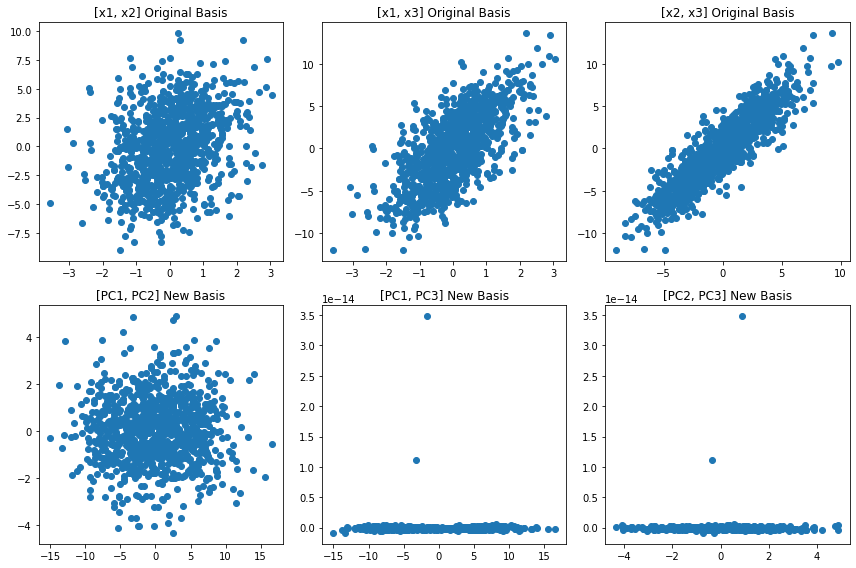

In [8]:
pca = PCA()
v_new_basis = pca.fit_transform(v)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0, 0].scatter(v[:, 0], v[:, 1])
axes[0, 0].set_title("[x1, x2] Original Basis")
axes[0, 1].scatter(v[:, 0], v[:, 2])
axes[0, 1].set_title("[x1, x3] Original Basis")
axes[0, 2].scatter(v[:, 1], v[:, 2])
axes[0, 2].set_title("[x2, x3] Original Basis")

axes[1, 0].scatter(v_new_basis[:, 0], v_new_basis[:, 1])
axes[1, 0].set_title("[PC1, PC2] New Basis")
axes[1, 1].scatter(v_new_basis[:, 0], v_new_basis[:, 2])
axes[1, 1].set_title("[PC1, PC3] New Basis")
axes[1, 2].scatter(v_new_basis[:, 1], v_new_basis[:, 2])
axes[1, 2].set_title("[PC2, PC3] New Basis")

plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [9]:
num = 10
sigma3 = 1/20 #factor 20 less 
uncorr_noise = np.random.normal(mu, sigma3, size=(N, num))

noisy_data = np.hstack((v, uncorr_noise))

print("Original Data Shape:", v.shape)
print("Noisy Data Shape:", noisy_data.shape)

Original Data Shape: (1000, 3)
Noisy Data Shape: (1000, 13)


In [10]:
num_noise_vars = 10
noise_stdev_factor = 20
noise_vars = np.random.normal(0, (sigma1 / noise_stdev_factor), size=(N, num_noise_vars))
v_with_noise = np.hstack((v, noise_vars))

In [11]:
# Original PCA
pca_original = PCA()
pca_original.fit(v)

# PCA with noise
pca_with_noise = PCA()
pca_with_noise.fit(noisy_data)

# Print the explained variances
print("Explained variance without noise:", pca_original.explained_variance_ratio_)
print("Explained variance with noise:", pca_with_noise.explained_variance_ratio_)


Explained variance without noise: [9.30187650e-01 6.98123501e-02 4.91342736e-32]
Explained variance with noise: [9.29354494e-01 6.97508460e-02 1.03809707e-04 1.01085094e-04
 9.67304989e-05 9.19185741e-05 8.96393730e-05 8.81412942e-05
 8.69581273e-05 8.29833865e-05 7.99430649e-05 7.34509521e-05
 9.17302973e-33]


In [12]:
cov = np.cov(noisy_data, rowvar=False)
l, V = np.linalg.eig(cov)
Lambda = np.diag(l)
print("Lambda shape:\n", Lambda.shape, '\n')
#print("Trace(A):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting two components, we retain %.2f%% of the total variability" % ((Lambda[0,0]+Lambda[1,1])/Lambda.trace()*100))
print("Selecting one more will increase by 0.01%")

Lambda shape:
 (13, 13) 

Trace(Lambda):
 28.000930218446403 

By selecting two components, we retain 99.91% of the total variability
Selecting one more will increase by 0.01%


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [13]:
print('I tried, but I could not figure it out..')

I tried, but I could not figure it out..


In [31]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [14]:
#file_name = "./data/magic04.data"
#df = pd.read_csv(file_name)
#df.shape

In [15]:
#file_path = "./data/magic04.names"
#with open(file_path, 'r') as file:
#   content = file.read()
#print(content)